## 선형 회귀분석의 기초

- 정의
- 종류
- Bias augmentation
- OLS (Ordinary Least Squares)
- 결정론적 모형
- 확률론적 모형

---

### 01. 정의 

회귀분석(regression analysis)은 독립 변수 $x$와 이에 대응하는 종속 변수 $y$간의 관계를 정량화하는 작업

독립 변수 $x$와 이에 대응하는 종속 변수 $y$간의 관계가 다음과 같은 선형 함수 $f(x)$일 때, 선형 회귀분석(linear regression analysis)이라 함

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx\;\; (모수 = w_0, \cdots, w_D) $$ 

---

### 02. 종류

#### 1. 결정론적 모형 (Deterministic Model)

독립 변수 $x$에 대해 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정

$$ \hat{y} = f \left( x \right) \approx y $$

#### 2. 확률적 모형 (Probabilistic Model)

데이터가 확률 변수로부터 생성된 표본이라 가정

---

### 03. Bias augmentation

#### 1. 개념

상수항이 0이 아닌 회귀분석모형인 경우, 수식을 간단하게 만들기 위해 상수항을 독립변수에 추가

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}\;\; (상수항\;1\;추가)
$$

오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

전체 수식이 밑과 같이 (바이어스 오그멘트된) 가중치 벡터와 (바이어스 오그멘트된) 입력 데이터 벡터의 내적으로 간단히 표시됨

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

- 상수항이 0이 아닌 경우에는 항상 바이어스 오그멘테이션을 실행
- 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 바이어스 오그멘테이션이 되어 있는 경우가 많음

#### 2. 예제

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

1) 직접 추가하기

In [2]:
# 원래 x 데이터 (1이 포함되지 않음)
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [3]:
# bias augmentation 실행
X = np.hstack([np.ones((X0.shape[0], 1)), X0]) # 0번째에 숫자 1을 글로벌하게 선언
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

2) StatsModels 이용 - bias augmentation 을 위한 `add_constant` 함수가 제공

In [4]:
import statsmodels.api as sm

X = sm.add_constant(X0) # X0에 bias augmentation 추가하기
X[:5]

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

---

### 04. OLS (Ordinary Least Squares)

#### 1. 정의

- 가장 기본적인 결정론적 선형 회귀 방법
- 잔차제곱합(RSS)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법

$$ \hat{y} = Xw\;\;에서\;\; e = {y} - \hat{y} = y - Xw$$

잔차 제곱합 (RSS)을 구해보면

$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\\\
&=& (y - Xw)^T(y - Xw) \\\\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

잔차 제곱합의 최소값을 구하기 위해 미분 즉, 그레디언트(gradient) 벡터를 구해야 함

$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 함

$$ \dfrac{d \text{RSS}}{d w}  = 0 $$

$$\therefore\; -2 X^T y + 2 X^TX w  = 0\;\;약분하면\;\; X^TX w = X^T y $$

$$w로\;\;정리하면\;\;w = (X^TX)^{-1} X^T y $$

#### 2. 정규 방정식

1) 정의 : 위에서 구한 그레디언트가 0벡터가 되는 관계

$$ X^T y - X^TX w = 0 $$

2) 정규 방적식을 인수 분해

$$ X^T (y - X w ) = X^T e = 0 $$

- $x_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터라고 가정
- 모든 차원 $d$에 대해  $x_d$는 잔차 벡터 $e$와 수직임

$$ x_d^T e = 0,\;\; x_d \perp e $$

---

### 05. 결정론적 선형회귀분석

#### 1) Numpy 이용

In [5]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [6]:
X.shape

(100, 2)

In [7]:
coef

array(80.71051956)

$$\therefore\;\; y = 100 + 80.7105 x + e $$

(1) OLS 해를 이용

In [8]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

$$ \hat{y} = 102.0270 + 81.5975 x $$

(2) lstsq 명령을 이용

In [9]:
w = np.linalg.lstsq(X, y)[0]
w

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[102.02701439],
       [ 81.59750943]])

$$ \hat{y} = 102.0270 + 81.5975 x $$

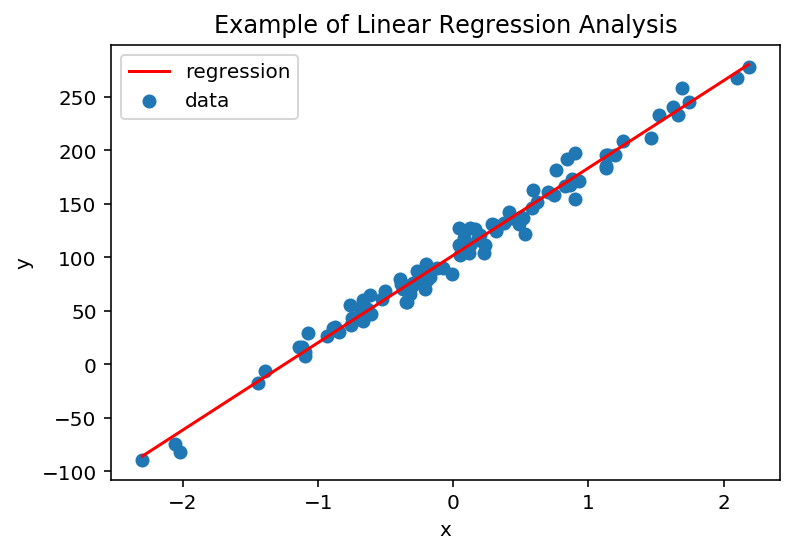

In [10]:
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

#### 2) Scikit-Learn 이용

`linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용

(1) 사용 방법

- LinearRegression 클래스 객체 생성
    
    model = LinearRegression(fit_intercept=True)
   
    상수항이 없으면 `fit_intercept=False`로 설정

- fit 메서드로 모형 추정. 오그멘테이션을 자동 지정
    
    model = model.fit(X, y)
    
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가짐. 또한 `fit` 메서드는 객체 자신을 반환
    * `coef_` : 추정된 가중치 벡터
    * `intercept_` : 추정된 상수항 

- predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    
    y_new = model.predict(x_new)
    

(2) 예시 - Boston

In [11]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [12]:
model_boston.coef_ # w1, w2 ...

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [13]:
model_boston.intercept_ # w0

36.49110328036104

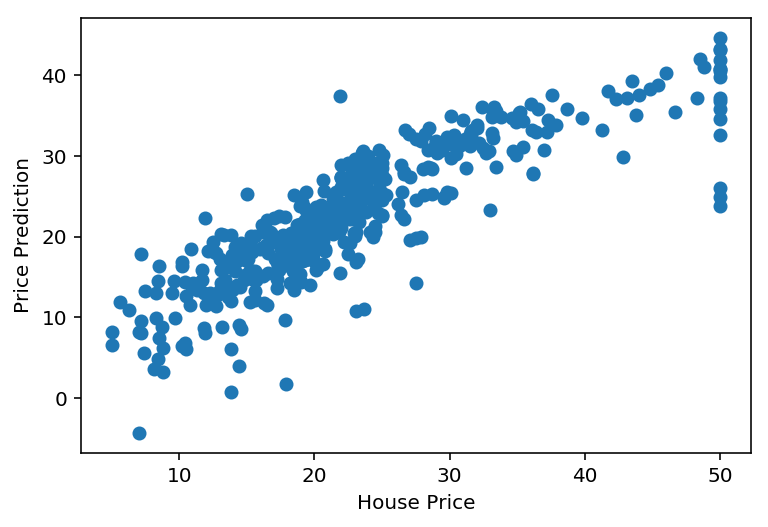

In [14]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel("House Price")
plt.ylabel("Price Prediction")
plt.show()

#### 3) 결정론적 선형회귀분석의 한계점

(1) 위의 그래프를 보고 $x$가 높을수록 $y$가 높다고 말할수 없다. ( $\because$ 오차가 얼마인지 모름)


(2) 실제로 영향을 미치지 않는 변수가 있는데 오차가 생겨 그렇지 않게 보일 수 있음


(3) coef크기가 단위로 결정되기 때문에 단위에 따라 변수가 영향을 미치는 정도가 달라짐


$\rightarrow$ 결정론적 회귀분석보다 확률론적 회귀분석을 사용

---

### 06. 확률론적 선형회귀분석

#### 1) Statsmodels 이용

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형회귀분석을 실시

(1) 이용 방법

- OLS 클래스 객체 생성

    - Scikit-Learn 패키지와 달리 데이터를 미리 줘야하고 사용자가 `add_constant` 으로 상수항을 직접 추가해야 함
    - 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.
    ```
    model = OLS(y, X)
    ```

- `fit` 메서드로 모형 추정 : 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력
    ```
    result = model.fit()
    ```

- RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해야 함

- RegressionResults 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용

    - resid : 잔차 벡터
    - params : 모수 벡터

- plot_regress_exog 명령은 회귀분석 결과를 살펴볼 수 있는 분석용 함수

(2) 예시 - Boston

In [15]:
# Boston Data 가져오기
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0) #(bias augmentaion 넣어주기)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [16]:
# statsmodels
model_boston2 = sm.OLS(dfy, dfX) # OLS 클래스 객체 생성
result_boston2 = model_boston2.fit() # fit 메서드 모형 추정
print(result_boston2.summary()) # summary

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        21:54:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

(3) Summary 살펴보기

- F-statistic 

    - 귀무가설(H0) :  w0 = w1 = $\cdots$ = 0
    - 귀무가설은 현실적으로 불가능 (모든 변수가 y와 관련이 없다는 의미이기 때문에)
    - 하지만 전반적인 비교를 하기 위해 진행함
    - p-value가 작은 값일수록 이 모델링의 성능이 좋다는 의미

- log-likelihood
    - 일반적으로 (-)값이 많이 나옴 ( $\because$ 일반적으로 0 < likelihood < 1)
    - 값이 작을수록 유용

- coef : 가중치 벡터
- std err : 표준 오차
- t : 통계량 (test statistics)
- p>|t| : 유의확률

- Omnibus : 잔차의 정규성 (H0 : 잔차 = 0)
- Jarque-Bera : 잔차의 정규성 (H0 : 잔차 = 0)
- Durbin-Watson : i,j번째 오차가 진짜 0인지 확인, 자기상관 분석 (값은 0~4 사이, 2에 가까울수록 자기상관이 없이 독립)
- Cond. No : X가 독립인지 아닌지

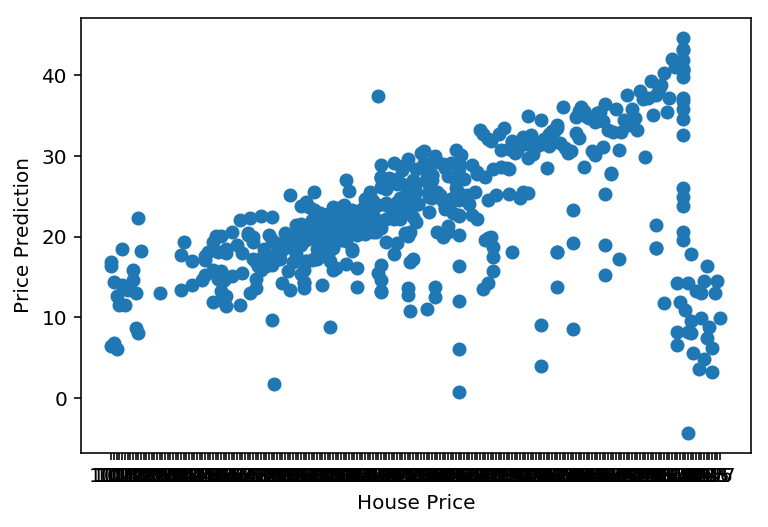

In [17]:
dfy_new = result_boston2.predict(dfX)
plt.scatter(dfy, dfy_new)

plt.xlabel("House Price")
plt.ylabel("Price Prediction")

plt.show()

In [18]:
# 잔차 벡터
result_boston2.resid.head() 

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

In [19]:
# 모수 벡터
result_boston2.params 

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

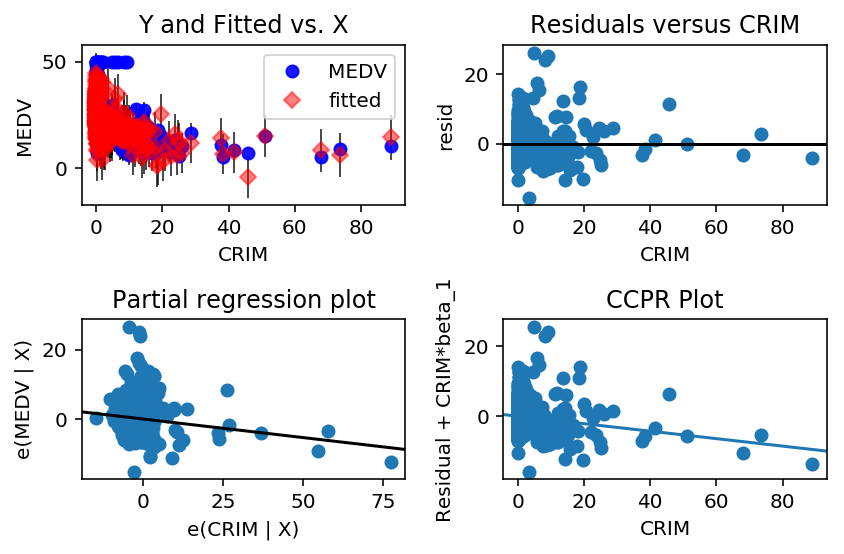

In [20]:
# 시각화
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

---

### 연습문제

#### `연습문제 1` 

1. `LinearRegression` 클래스를 사용하여 위에서 구한 1차원 가상 데이터 `X`, `y`를 회귀분석한다. 
2. 이렇게 구한 가중치 계수들의 값은 올바른 값에 대해 어느 정도의 오차를 보이는가?
3. 시드값을 다르게 하여 새로운 가상 데이터 `X`, `y`를 만들고 회귀분석을 한다. 이번에는 가중치 계수의 오차가 어떻게 달라졌는가? 가중치 계수의 오차는 일반적으로 어느 정도의 크기를 가지는가?

#### `연습 문제 2`

1. `OLS` 클래스를 사용하여 위에서 구한 1차원 가상 데이터 `X`, `y`를 회귀분석한다. 
2. 임의의 값 `x_new=1.0` 를 지정하여 이 값에 대한 모형 예측치 `y_new` 를 구하라.